# Feature importances estimation

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
file=pd.read_csv('train.csv')

In [3]:
file.head()

,number_of_elements,mean_atomic_mass,wtd_mean_atomic_mass,gmean_atomic_mass,wtd_gmean_atomic_mass,entropy_atomic_mass,wtd_entropy_atomic_mass,range_atomic_mass,wtd_range_atomic_mass,std_atomic_mass,...,wtd_mean_Valence,gmean_Valence,wtd_gmean_Valence,entropy_Valence,wtd_entropy_Valence,range_Valence,wtd_range_Valence,std_Valence,wtd_std_Valence,critical_temp
0,4,88.944468,57.862692,66.361592,36.116612,1.181795,1.062396,122.90607,31.794921,51.968828,...,2.257143,2.213364,2.219783,1.368922,1.066221,1,1.085714,0.433013,0.437059,29.0
1,5,92.729214,58.518416,73.132787,36.396602,1.449309,1.057755,122.90607,36.161939,47.094633,...,2.257143,1.888175,2.210679,1.557113,1.047221,2,1.128571,0.632456,0.468606,26.0
2,4,88.944468,57.885242,66.361592,36.122509,1.181795,0.975980,122.90607,35.741099,51.968828,...,2.271429,2.213364,2.232679,1.368922,1.029175,1,1.114286,0.433013,0.444697,19.0
3,4,88.944468,57.873967,66.361592,36.119560,1.181795,1.022291,122.90607,33.768010,51.968828,...,2.264286,2.213364,2.226222,1.368922,1.048834,1,1.100000,0.433013,0.440952,22.0
4,4,88.944468,57.840143,66.361592,36.110716,1.181795,1.129224,122.90607,27.848743,51.968828,...,2.242857,2.213364,2.206963,1.368922,1.096052,1,1.057143,0.433013,0.428809,23.0


## Separating high temperature and low temperature superconductor

Temperature above 77K is considered high temperature superconductor

 Source: Timmer, John (May 2011). "25 years on, the search for higher-temp superconductors continues". Ars Technica. Archived from the original on 4 March 2012. Retrieved 2 March 2012.

Separating temperature = 77K

In [4]:
separating_temp= 77

In [5]:
low_temperature=file[file['critical_temp'] <= separating_temp]

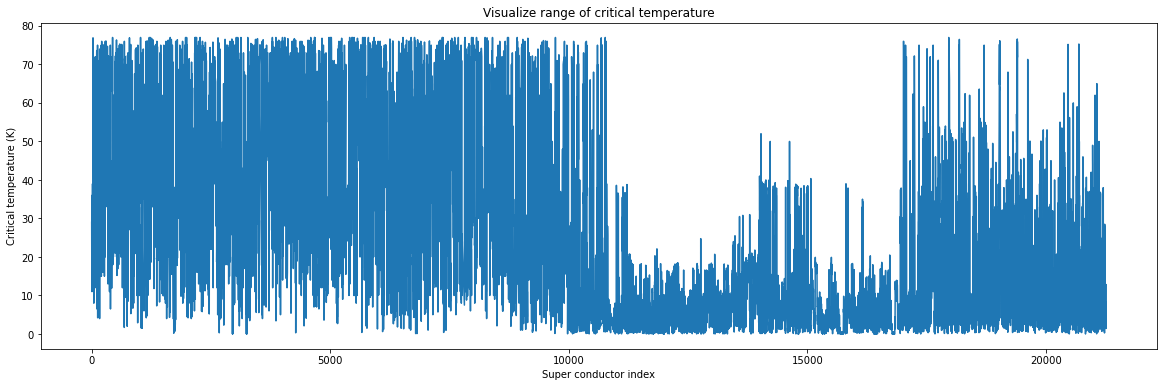

In [6]:
# Define plot space
fig, ax = plt.subplots(figsize=(20, 6))

# Define x and y axes
ax.plot(low_temperature.index, 
        low_temperature['critical_temp'])

# Set plot title and axes labels
ax.set(title = "Visualize range of critical temperature",
       xlabel = "Super conductor index",
       ylabel = "Critical temperature (K)")

plt.show()

Above picture shows variations of critical temperature for low temperature super conductor

C:\Users\Hamzah\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


[Text(0.5, 0, 'Critical temperature '), Text(0, 0.5, 'Frequency')]

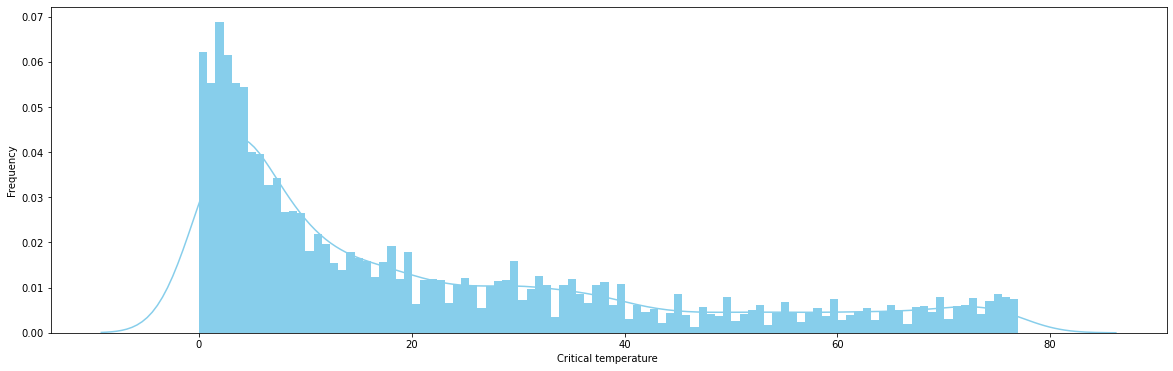

In [7]:

fig, ax = plt.subplots(figsize=(20, 6))
ax = sns.distplot(low_temperature['critical_temp'],
                  bins=100,
                  kde=True,
                  color='skyblue',
                  hist_kws={"linewidth": 15,'alpha':1})
ax.set(xlabel='Critical temperature ', ylabel='Frequency')

## Probability density high between 0 to 20 K of critical temperature. So dividing low temperature superconductor into ultra-low and low temperature superconductor.

In [8]:
u_low=low_temperature

In [9]:
## Correlation

In [10]:
import pandas as pd
from scipy.stats import pearsonr

In [11]:

 
#  
# Convert dataframe into series
list1 = low_temperature['mean_atomic_mass']
list2 = low_temperature['critical_temp']
 
# Apply the pearsonr()
corr, _ = pearsonr(list1, list2)
print('Pearsons correlation: %.3f' % corr)

Pearsons correlation: -0.194


In [12]:
data1=low_temperature.iloc[:,1:11]
data1['critical_temp']=low_temperature['critical_temp']

In [48]:
data1

,mean_atomic_mass,wtd_mean_atomic_mass,gmean_atomic_mass,wtd_gmean_atomic_mass,entropy_atomic_mass,wtd_entropy_atomic_mass,range_atomic_mass,wtd_range_atomic_mass,std_atomic_mass,wtd_std_atomic_mass,critical_temp
0,88.944468,57.862692,66.361592,36.116612,1.181795,1.062396,122.90607,31.794921,51.968828,53.622535,29.00
1,92.729214,58.518416,73.132787,36.396602,1.449309,1.057755,122.90607,36.161939,47.094633,53.979870,26.00
2,88.944468,57.885242,66.361592,36.122509,1.181795,0.975980,122.90607,35.741099,51.968828,53.656268,19.00
3,88.944468,57.873967,66.361592,36.119560,1.181795,1.022291,122.90607,33.768010,51.968828,53.639405,22.00
4,88.944468,57.840143,66.361592,36.110716,1.181795,1.129224,122.90607,27.848743,51.968828,53.588771,23.00
...,...,...,...,...,...,...,...,...,...,...,...
21257,89.389833,89.389833,63.694713,63.694713,0.782574,0.782574,164.13150,54.710500,73.156893,73.156893,3.43
21258,106.957877,53.095769,82.515384,43.135565,1.177145,1.254119,146.88130,15.504479,65.764081,43.202659,2.44
21260,99.663190,95.609104,99.433882,95.464320,0.690847,0.530198,13.51362,53.041104,6.756810,5.405448,1.98
21261,99.663190,97.095602,99.433882,96.901083,0.690847,0.640883,13.51362,31.115202,6.756810,6.249958,1.84


In [91]:
#sns.pairplot(data=data1)

In [14]:
# decision tree for feature importance on a regression problem
y=low_temperature['critical_temp']
index_1=low_temperature.columns.tolist()[0:-1]
X=low_temperature[index_1]
from sklearn.datasets import make_regression
from sklearn.tree import DecisionTreeRegressor
from matplotlib import pyplot
# define dataset
#X, y = make_regression(n_samples=1000, n_features=10, n_informative=5, random_state=1)
# define the model
model = DecisionTreeRegressor()
# fit the model
model.fit(X, y)
# get importance
importance = model.feature_importances_


In [15]:
features=pd.DataFrame(data={'Features':index_1,'importance':importance})
features

,Features,importance
0,number_of_elements,0.000010
1,mean_atomic_mass,0.003407
2,wtd_mean_atomic_mass,0.012673
3,gmean_atomic_mass,0.001508
4,wtd_gmean_atomic_mass,0.002014
...,...,...
76,wtd_entropy_Valence,0.002815
77,range_Valence,0.000380
78,wtd_range_Valence,0.028092
79,std_Valence,0.000625


In [16]:
features=features.sort_values(by='importance',ascending=False)

In [17]:
features

,Features,importance
67,range_ThermalConductivity,0.496504
64,wtd_gmean_ThermalConductivity,0.106343
31,mean_Density,0.030617
78,wtd_range_Valence,0.028092
35,entropy_Density,0.023792
...,...,...
13,gmean_fie,0.000286
57,range_FusionHeat,0.000277
27,range_atomic_radius,0.000156
71,mean_Valence,0.000085


In [22]:
features['Features'] = features['Features'].str.split('_', 1).str[-1]
features['Features'] = features['Features'].str.split('_', 1).str[-1]
features['Features'] = features['Features'].str.split('_', 1).str[-1]

In [23]:
features=features.drop_duplicates(subset=['Features'], keep='first')

In [24]:
features=features[['Features','importance']]

In [25]:
features

,Features,importance
67,ThermalConductivity,0.496504
31,Density,0.030617
78,Valence,0.028092
47,ElectronAffinity,0.015470
12,fie,0.015066
56,FusionHeat,0.014199
2,mass,0.012673
30,radius,0.008696
0,elements,0.000010


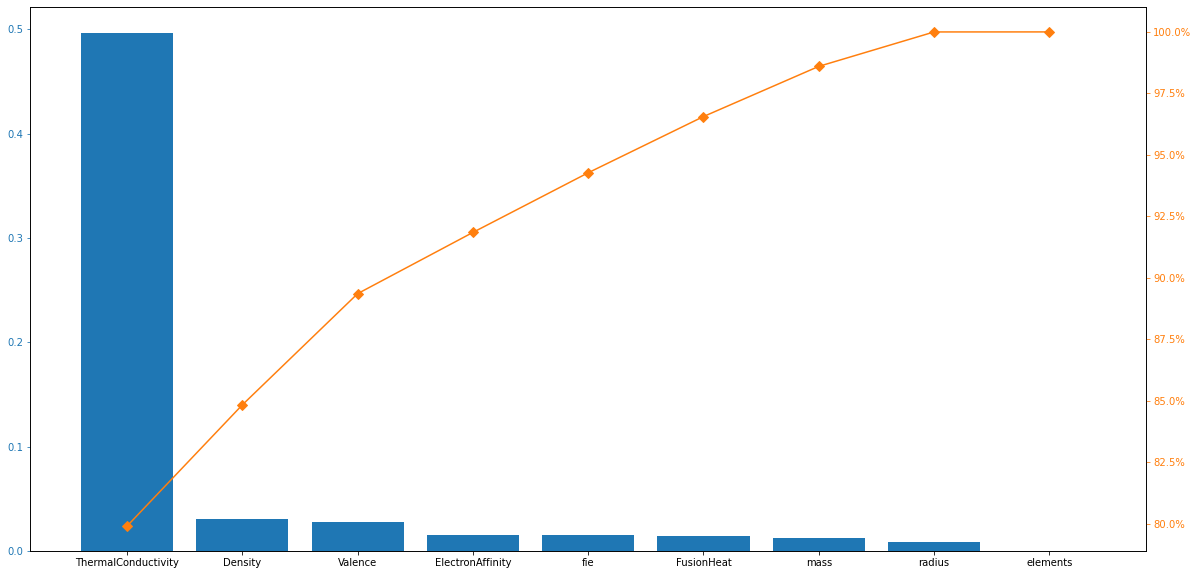

In [26]:
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.ticker import PercentFormatter


features["cumpercentage"] = features["importance"].cumsum()/features["importance"].sum()*100


fig, ax = plt.subplots(figsize=(20, 10))
ax.bar(features['Features'], features["importance"], color="C0")
ax2 = ax.twinx()
ax2.plot(features['Features'], features["cumpercentage"], color="C1", marker="D", ms=7)
ax2.yaxis.set_major_formatter(PercentFormatter())

ax.tick_params(axis="y", colors="C0")
ax2.tick_params(axis="y", colors="C1")
plt.show()

## Division of low temperature superconductor based on distribution

## Superconductor below 20K critical temperature

In [27]:
low_temperature_ultra=low_temperature[low_temperature['critical_temp'] <= 20]
y=low_temperature_ultra['critical_temp']
index_1=low_temperature_ultra.columns.tolist()[0:-1]
X=low_temperature_ultra[index_1]
# decision tree for feature importance on a regression problem
from sklearn.datasets import make_regression
from sklearn.tree import DecisionTreeRegressor
from matplotlib import pyplot
# define dataset
#X, y = make_regression(n_samples=1000, n_features=10, n_informative=5, random_state=1)
# define the model
model = DecisionTreeRegressor()
# fit the model
model.fit(X, y)
# get importance
importance = model.feature_importances_


In [96]:
importance

array([3.23989950e-05, 1.63267391e-03, 6.12280603e-02, 2.39126506e-03,
       1.25073972e-02, 9.65010954e-03, 5.84358226e-03, 1.25672262e-03,
       1.21010315e-02, 3.10117525e-03, 6.00860835e-03, 1.13114178e-02,
       1.25257177e-02, 2.30286654e-03, 6.37055629e-03, 7.64012942e-03,
       4.84673851e-03, 1.74398407e-01, 5.03910380e-03, 7.84683795e-03,
       1.10547352e-02, 3.58289890e-03, 1.98807309e-02, 1.69131890e-03,
       1.40397084e-02, 8.93140797e-03, 7.19808682e-03, 2.49599995e-03,
       4.41810333e-02, 8.90667974e-03, 1.10961451e-02, 6.42690603e-04,
       5.42945413e-03, 4.01077595e-03, 4.39843624e-03, 3.46169426e-04,
       4.67967925e-03, 7.91107621e-04, 6.69608998e-03, 1.90960533e-03,
       1.26434514e-02, 1.80278656e-03, 5.33307377e-03, 2.92651551e-03,
       2.95750218e-02, 5.45719894e-03, 6.62134809e-03, 5.77004868e-04,
       9.10511364e-03, 2.16223404e-03, 1.18963065e-02, 9.12728283e-03,
       8.31551467e-03, 3.66413205e-03, 4.64072837e-02, 4.98016144e-03,
      

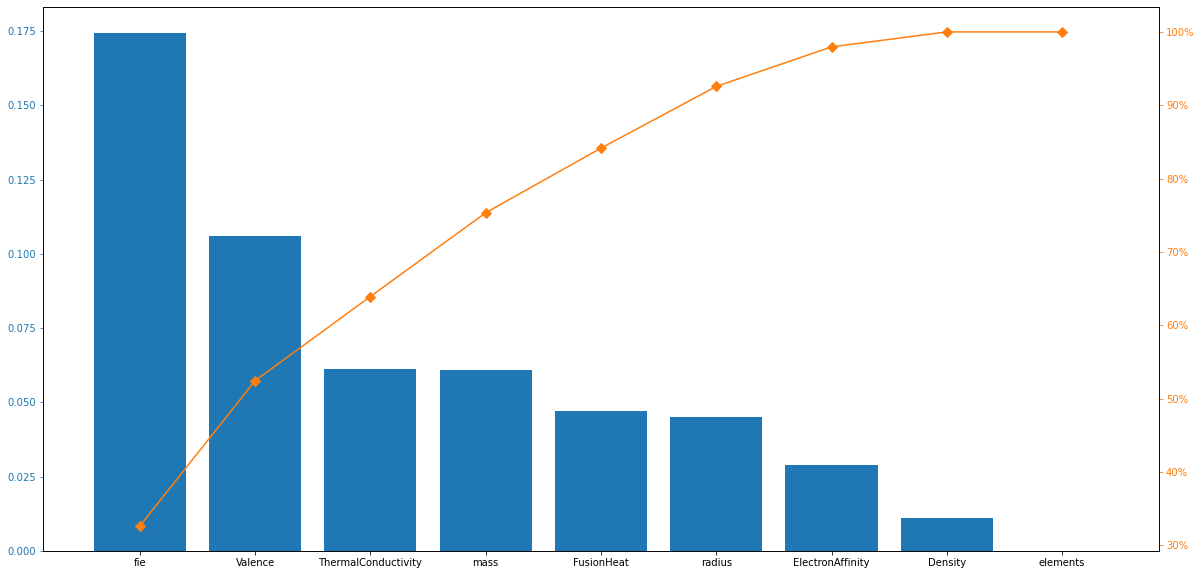

In [28]:

features=pd.DataFrame(data={'Features':index_1,'importance':importance})
features=features.sort_values(by='importance',ascending=False)
features['Features'] = features['Features'].str.split('_', 1).str[-1]
features['Features'] = features['Features'].str.split('_', 1).str[-1]
features['Features'] = features['Features'].str.split('_', 1).str[-1]
features=features.drop_duplicates(subset=['Features'], keep='first')
features=features[['Features','importance']]
features["cumpercentage"] = features["importance"].cumsum()/features["importance"].sum()*100

fig, ax = plt.subplots(figsize=(20, 10))
ax.bar(features['Features'], features["importance"], color="C0")
ax2 = ax.twinx()
ax2.plot(features['Features'], features["cumpercentage"], color="C1", marker="D", ms=7)
ax2.yaxis.set_major_formatter(PercentFormatter())

ax.tick_params(axis="y", colors="C0")
ax2.tick_params(axis="y", colors="C1")
plt.show()

## For superconductor with critical temperature above 20K

In [29]:
low_temperature_2=low_temperature[low_temperature['critical_temp'] > 20]
y=low_temperature_2['critical_temp']
index_1=low_temperature_2.columns.tolist()[0:-1]
X=low_temperature_2[index_1]
# decision tree for feature importance on a regression problem
from sklearn.datasets import make_regression
from sklearn.tree import DecisionTreeRegressor
from matplotlib import pyplot
# define dataset
#X, y = make_regression(n_samples=1000, n_features=10, n_informative=5, random_state=1)
# define the model
model = DecisionTreeRegressor()
# fit the model
model.fit(X, y)
# get importance
importance = model.feature_importances_


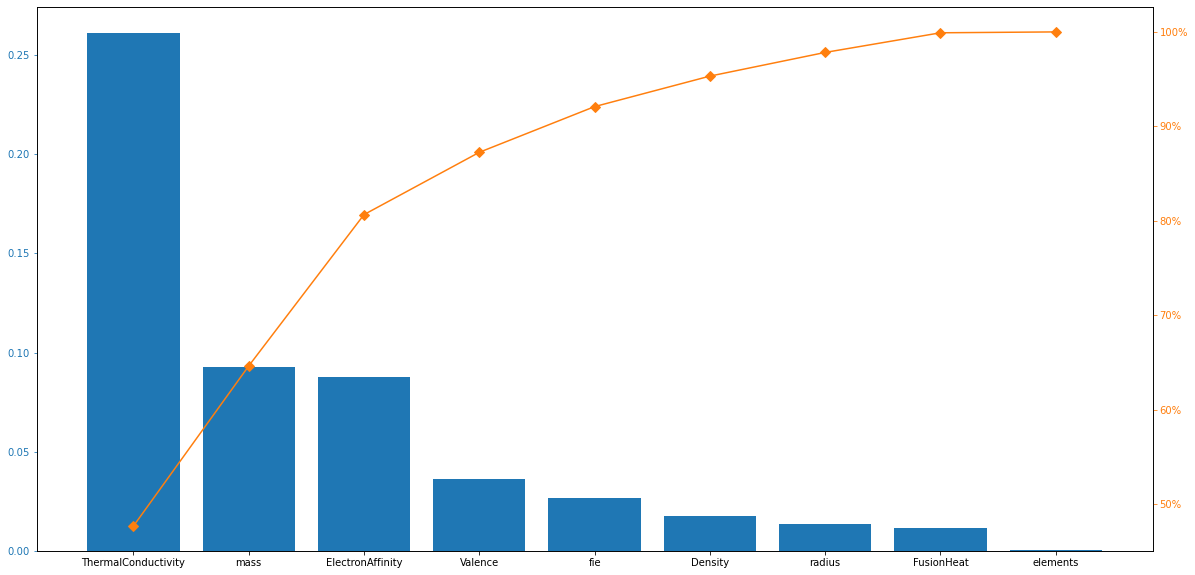

In [30]:

features=pd.DataFrame(data={'Features':index_1,'importance':importance})
features=features.sort_values(by='importance',ascending=False)
features['Features'] = features['Features'].str.split('_', 1).str[-1]
features['Features'] = features['Features'].str.split('_', 1).str[-1]
features['Features'] = features['Features'].str.split('_', 1).str[-1]

features=features.drop_duplicates(subset=['Features'], keep='first')
features=features[['Features','importance']]
features["cumpercentage"] = features["importance"].cumsum()/features["importance"].sum()*100

fig, ax = plt.subplots(figsize=(20, 10))
ax.bar(features['Features'], features["importance"], color="C0")
ax2 = ax.twinx()
ax2.plot(features['Features'], features["cumpercentage"], color="C1", marker="D", ms=7)
ax2.yaxis.set_major_formatter(PercentFormatter())

ax.tick_params(axis="y", colors="C0")
ax2.tick_params(axis="y", colors="C1")
plt.show()

# Prediction

In [31]:
import pandas as pd
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error,mean_absolute_percentage_error

In [32]:
file = pd.read_csv('train.csv')
y=file['critical_temp']
x= file.drop(['critical_temp'],axis=1)
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.05, random_state=42)

In [33]:
regressor = RandomForestRegressor(n_estimators = 1000, random_state = 0)

In [34]:
regressor.fit(X_train, y_train)  


RandomForestRegressor(n_estimators=1000, random_state=0)

In [35]:
Y_pred = regressor.predict(X_test) 

In [36]:
error=mean_absolute_percentage_error(y_test, Y_pred)

In [39]:
error

1.492219609990375

In [ ]:
fig, axs = plt.subplots(2, 1,figsize=(20, 30))

axs[0, 0].plot(sns.regplot(x=list1, y=list2))
#sns.jointplot(data=penguins, x=list1, y=list2)
axs[0, 0].set_title('Axis [0, 0]')
axs[0, 1].plot(x, y, 'tab:orange')
axs[0, 1].set_title('Axis [0, 1]')
axs[1, 0].plot(x, -y, 'tab:green')
axs[1, 0].set_title('Axis [1, 0]')
axs[1, 1].plot(x, -y, 'tab:red')
axs[1, 1].set_title('Axis [1, 1]')

for ax in axs.flat:
    ax.set(xlabel='x-label', ylabel='y-label')

# Hide x labels and tick labels for top plots and y ticks for right plots.
for ax in axs.flat:
    ax.label_outer()

In [ ]:
# summarize feature importance
for i,v in enumerate(importance):
	print('Feature: %0d, Score: %.5f' % (i,v))
# plot feature importance
pyplot.bar([x for x in range(len(importance))], importance)
pyplot.show()

In [51]:
data1=low_temperature.iloc[:,12:22]
data1['critical_temp']=low_temperature['critical_temp']

In [53]:
sns.pairplot(data=low_temperature)

KeyboardInterrupt: 

Error in callback <function flush_figures at 0x000002DAE8216280> (for post_execute):


KeyboardInterrupt: 

NameError: name 'penguins' is not defined

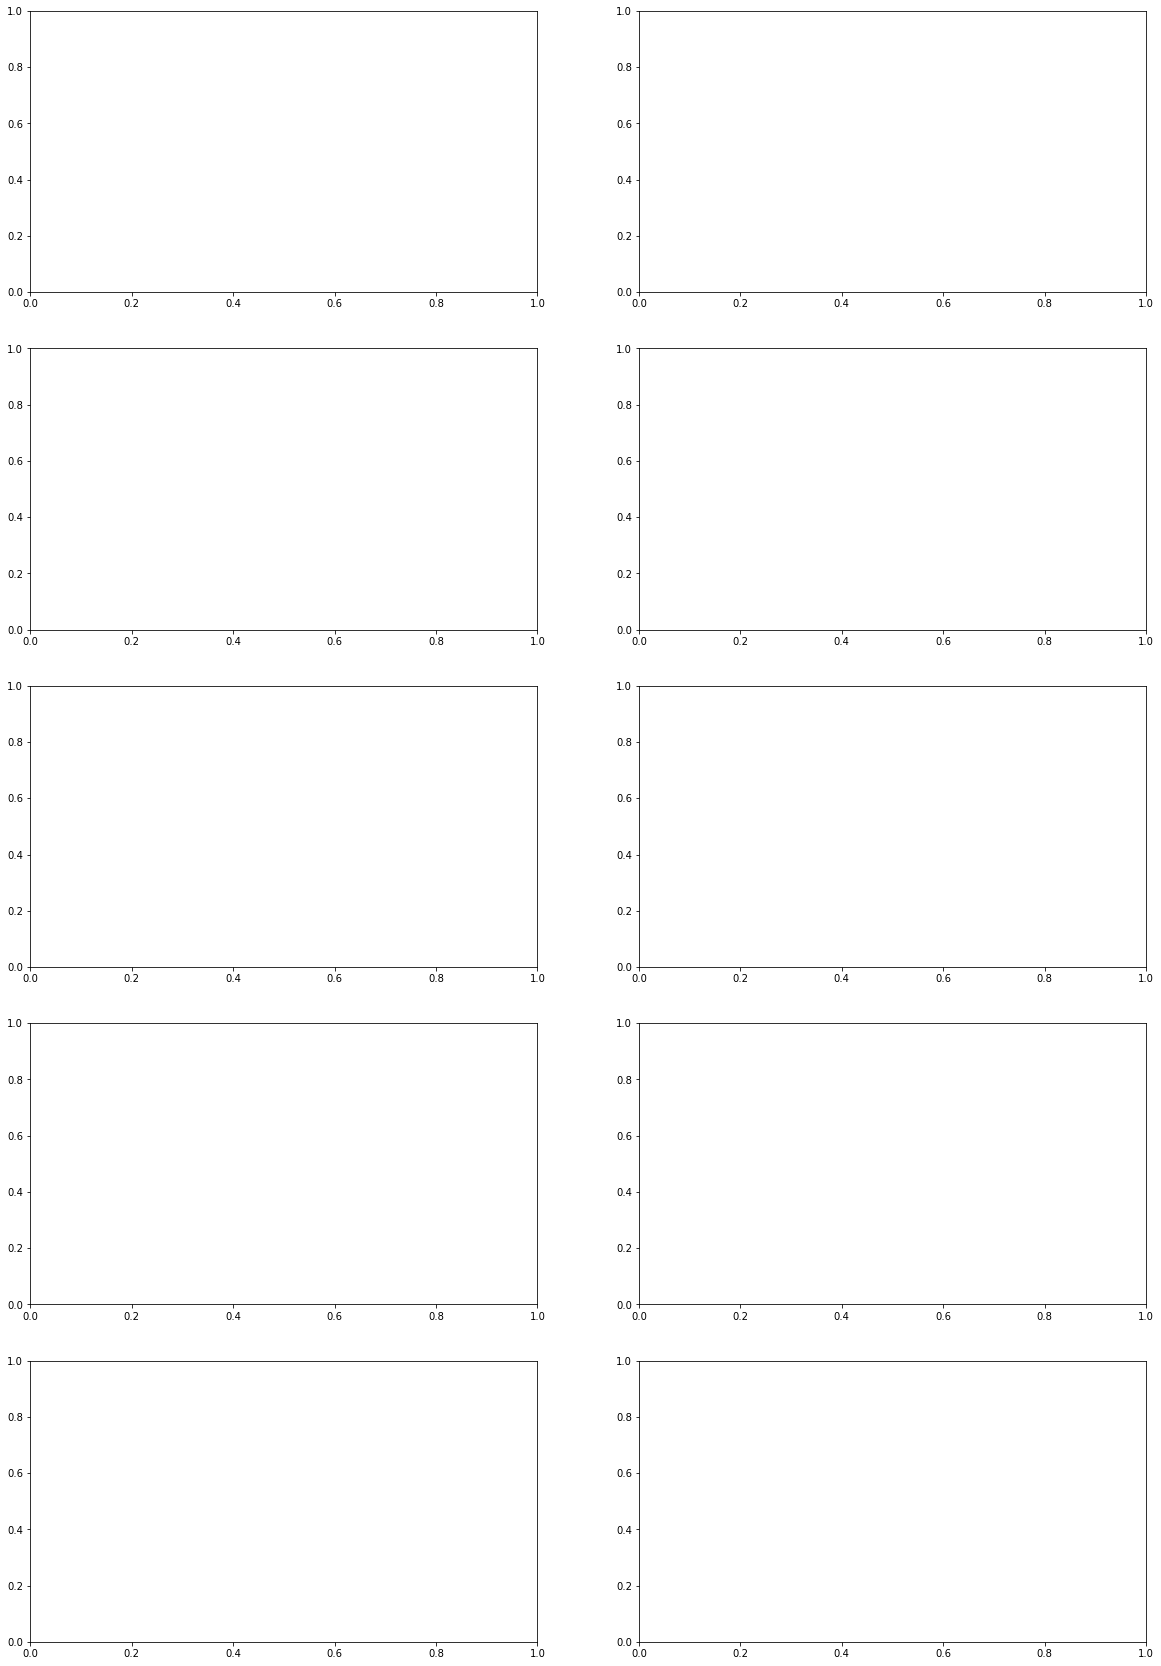

In [30]:
fig, axs = plt.subplots(5, 2,figsize=(20, 30))

axs[0, 0].plot(sns.regplot(x=list1, y=list2))
#sns.jointplot(data=penguins, x=list1, y=list2)
axs[0, 0].set_title('Axis [0, 0]')
axs[0, 1].plot(x, y, 'tab:orange')
axs[0, 1].set_title('Axis [0, 1]')
axs[1, 0].plot(x, -y, 'tab:green')
axs[1, 0].set_title('Axis [1, 0]')
axs[1, 1].plot(x, -y, 'tab:red')
axs[1, 1].set_title('Axis [1, 1]')

for ax in axs.flat:
    ax.set(xlabel='x-label', ylabel='y-label')

# Hide x labels and tick labels for top plots and y ticks for right plots.
for ax in axs.flat:
    ax.label_outer()

In [ ]:
import seaborn as sns
sns.regplot(x=df["sepal length (cm)"], y=df["petal length (cm)"])

<AxesSubplot:>

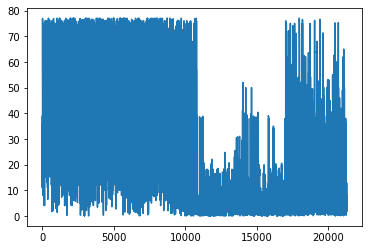

In [11]:
low_temperature['critical_temp'].plot()